In [3]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [4]:
precip = nc.Dataset("/Users/jilliannallison/eds-220/EDS220_Fall2022/precip_data.nc")

In [5]:
precip.variables

OrderedDict([('longitude',
              <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (7,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude',
              <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (6,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time',
              <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:00.0
                  long_name: time
                  calendar: gregorian
              unlimited dimensions: 
              current shape = (24,)
    

In [6]:
precip

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2022-11-04 02:33:08 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data4/adaptor.mars.internal-1667529188.2819111-24014-2-31eda61d-58c5-492a-82cc-4edb395689ca.nc /cache/tmp/31eda61d-58c5-492a-82cc-4edb395689ca-adaptor.mars.internal-1667529185.6998148-24014-3-tmp.grib
    dimensions(sizes): longitude(7), latitude(6), time(24)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 tp(time,latitude,longitude)
    groups: 

In [26]:
lon = precip.variables['longitude'][:]
lat = precip.variables['latitude'][:]
data = precip.variables['tp'][0,:,:]
time = nc.num2date(precip.variables['time'][:],
                    units='milliseconds since 1970-01-01T00:00:00',
                  calendar = 'standard')

/tmp/ipykernel_3044261/782438555.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = precip.variables['longitude'][:]
/tmp/ipykernel_3044261/782438555.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = precip.variables['latitude'][:]
/tmp/ipykernel_3044261/782438555.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the buil

In [27]:
lon2d, lat2d = np.meshgrid(lon, lat)

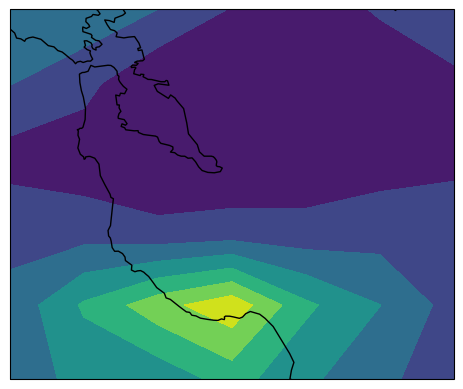

In [28]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-121.25,-122.75,36.75,38])
ax.coastlines()
# Add coloring for ocean
ax.add_feature(cartopy.feature.OCEAN)
# Add coloring for land
ax.add_feature(cartopy.feature.LAND)
ax.contourf(lon2d, lat2d, data, transform = ccrs.PlateCarree())